In [144]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
from src.dm import DataModule

dm = DataModule(s1_bands=None, months=['April'], batch_size=4)
dm.setup()

train: 8689
test: 2773


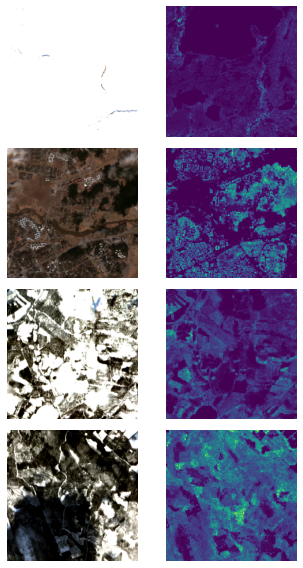

In [146]:
import matplotlib.pyplot as plt

x, labels = next(iter(dm.train_dataloader(shuffle=False)))
s1s, s2s = x
fig = plt.figure(figsize=(5, 2*dm.batch_size))
for i in range(dm.batch_size):
    ax = plt.subplot(dm.batch_size, 2, 2*i+1)
    ax.imshow(s2s[i][0].permute(1, 2, 0))
    ax.axis('off')
    ax = plt.subplot(dm.batch_size, 2, 2*i+2)
    ax.imshow(labels[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [147]:
from src.models.unet import UNet

hparams = {
    'encoder': 'resnet18',
    'pretrained': None,
    'in_channels': 3
}

model = UNet(hparams)

_x, y = model(x, labels)

_x.shape, y.shape

(torch.Size([4, 1, 3, 256, 256]), torch.Size([4, 256, 256]))

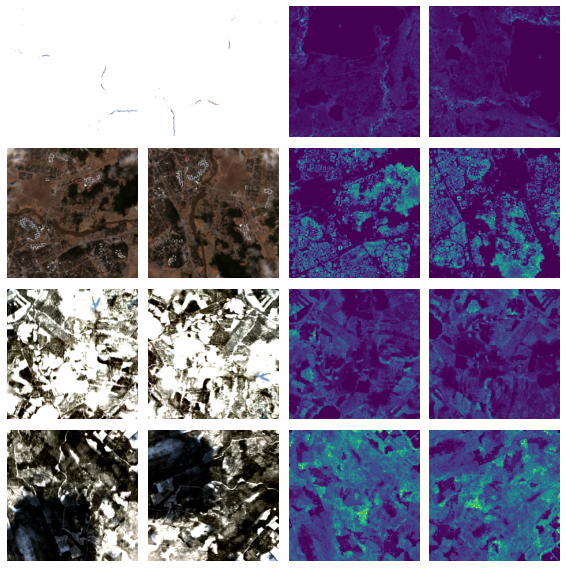

In [150]:
x_trans, y_trans = model(x, labels)
fig = plt.figure(figsize=(8, 2*dm.batch_size))
for i in range(dm.batch_size):
    ax = plt.subplot(dm.batch_size, 4, 4*i+1)
    ax.imshow(s2s[i][0].permute(1, 2, 0))
    ax.axis('off')
    ax = plt.subplot(dm.batch_size, 4, 4*i+2)
    ax.imshow(x_trans[i][0].permute(1, 2, 0))
    ax.axis('off')
    ax = plt.subplot(dm.batch_size, 4, 4*i+3)
    ax.imshow(labels[i])
    ax.axis('off')
    ax = plt.subplot(dm.batch_size, 4, 4*i+4)
    ax.imshow(y_trans[i])
    ax.axis('off')
plt.tight_layout()
plt.show()